# Matplotlib

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/javism/fi2022-2023/blob/main/practica07/practica07_matplotlib.ipynb)

[Matplotlib](https://matplotlib.org/) es una completa biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Si usas python en conda lo habitual es que esté instalada por defecto. 

Instalación con conda: 
```
conda install matplotlib
```

Instalación con pip: 
```
pip install matplotlib
```

La documentación oficial es muy completa y tiene organizados tutoriales por niveles de dificultad en https://matplotlib.org/stable/tutorials/index.html. Echa un vistazo:
* [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)
* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) (este es suficiente para la asignatura)
* [Galería de ejemplos](https://matplotlib.org/stable/gallery/index.html)


## Gáfico básico

Primer gráfico de ejemplo (el eje x se genera automáticamente si no se pasa un vector):

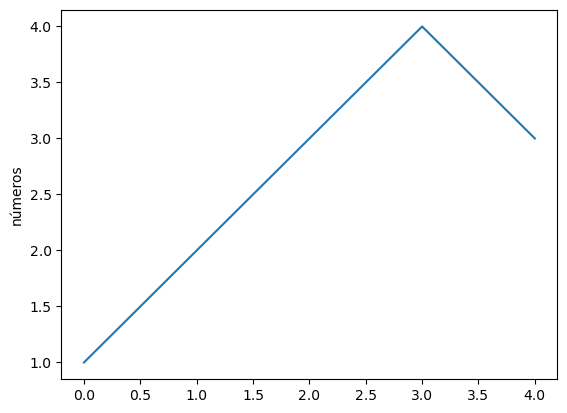

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 3])
plt.ylabel('números')
plt.show()

`plot` es una función versátil, que acepta un número arbitrario de argumentos. Por ejemplo, para trazar x frente a y, puede escribir:

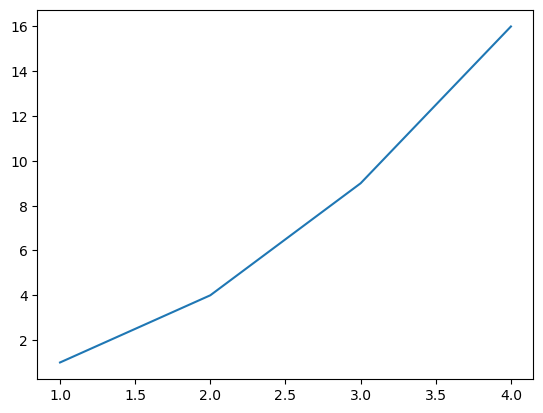

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## Formato gráficos

Para cada par de argumentos x, y, hay un tercer argumento opcional que es la cadena de formato que indica el color y el tipo de línea del gráfico

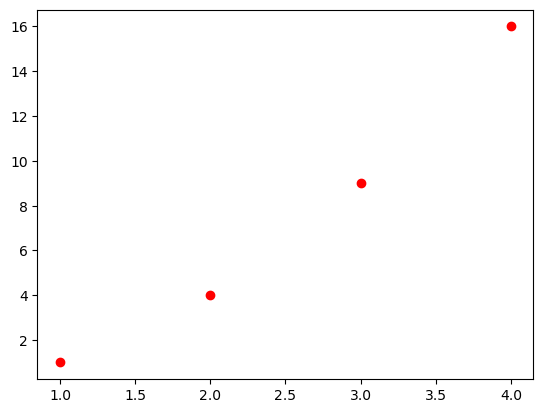

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')

Por defecto se usa la línea en azul, que se especifica con 'b-'. Esto genera el mismo efecto que no ponerlo. Puedes ver todas las opciones de formato de puntos, líneas y colores aquí:
* https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html


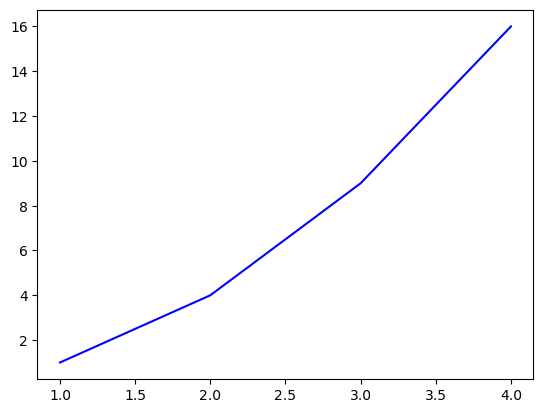

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'b-')

## Series de datos como np.array

El tipo de dato más natural para dibujar es el array de numpy. El siguiente ejemplo dibuja varias funciones con diferentes estilo. Observa que siempre tenemos los argumentos de 3 en 3 (x, y, estilo) para cada serie de datos. 

Ejercicios: 
* Prueba a cambiar colores y a añadir una cuarta serie de datos con otra función, por ejemplo: `t, 40+20*np.sin(t*10), 'y-'`
* Cambia los parámetros de arange para ver diferentes efectos. 
* Se pueden dibujar varias series en la misma llamada a plot o en sucesivas que se dibujan sobre la misma figura. 



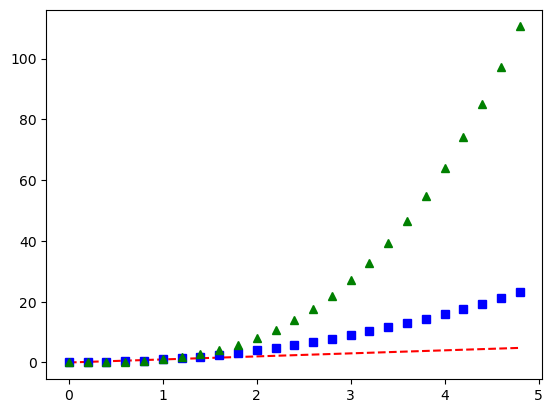

In [5]:
import numpy as np

# Genera datos uniformemente distribuídos entre 0 y 5 en intervaloes de 0.2
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

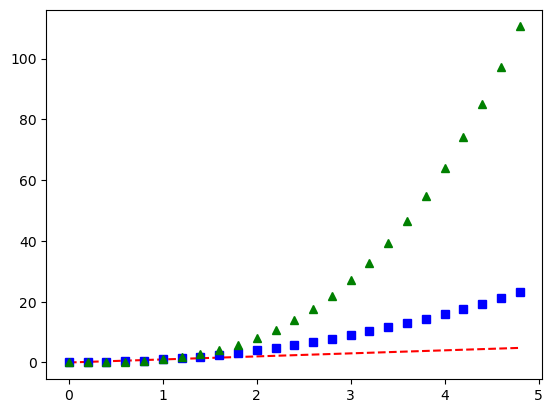

In [6]:
import numpy as np

# Genera datos uniformemente distribuídos entre 0 y 5 en intervaloes de 0.2
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
t = np.arange(0., 5., 0.2)
plt.show()

## Trabajo con variables categóricas

<BarContainer object of 3 artists>

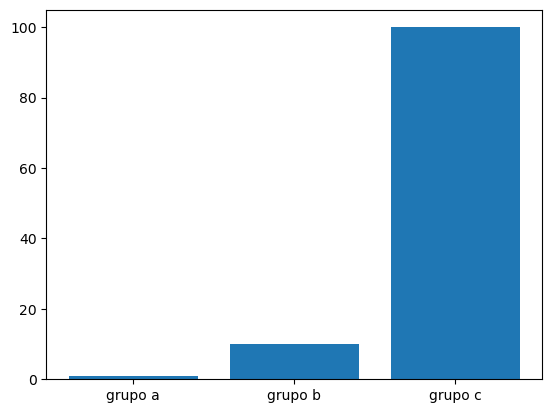

In [7]:
names = ['grupo a', 'grupo b', 'grupo c']
values = [1, 10, 100]

plt.bar(names, values)

Varias llamadas a plot() dibujan sobre la misma figura. Si queremos hacer varios dibujos tendremos que usar `plt.subplot()` o generar una gráfica nueva sucesivamente llamando a `plt.figure()`. 

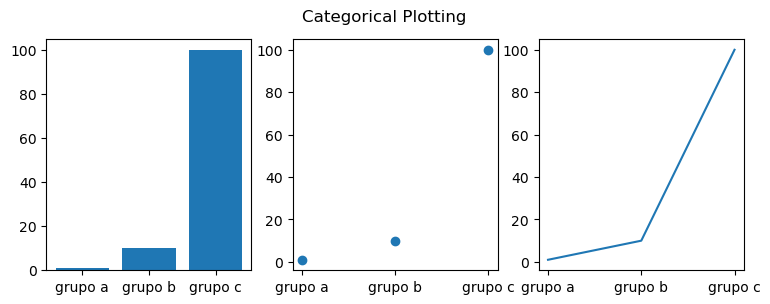

In [8]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Histogramas

Los histogramas son una forma de visualizar rápidamente una variable aleatoria. En este ejemplo generamos datos aleatorios con una distribución uniforme y luego con una distribución normal. 

A veces nos interesará superponer datos en la misma gráfica. En el ejemplo usamos la transparencia (`alpha=0.5`) para poder comparar. Si descomentas plt.figure() verás que se generan dos gráficas distintas. 

(array([ 4.,  4., 12., 20., 15., 17., 19.,  5.,  2.,  2.]),
 array([-1.75779912, -0.21597516,  1.3258488 ,  2.86767276,  4.40949672,
         5.95132068,  7.49314464,  9.0349686 , 10.57679256, 12.11861651,
        13.66044047]),
 <BarContainer object of 10 artists>)

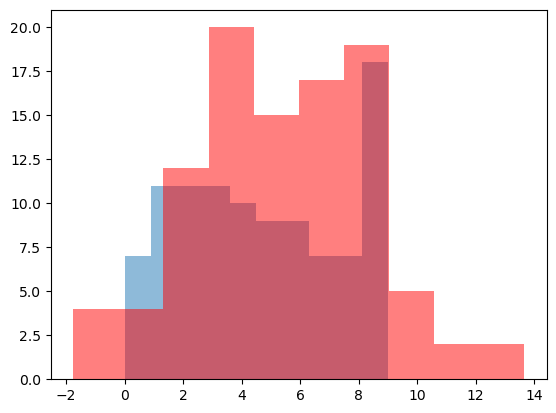

In [9]:
# Si no descomentas plt.figure() los gráficos se superponen en vez de dibujarse en figuras independientes
#plt.figure()
x1 = np.random.randint(0,10,100)
x2 = np.random.normal(5,3,100)
plt.hist(x1, alpha=0.5)
#plt.figure()
plt.hist(x2,color='red', alpha=0.5)

## Dibujando varias funciones y exportar gráficos a un fichero

A continuación vamos a dibujar funciones de distintas formas. Podemos definir una función auxiliar para el dibujo, o, como hemos hecho antes, incluir la fórmula en el lugar donde iría el valor y. Además vamos a hacer uso de `legend` y `title` para anotar los datos. 

Exportar los datos a un fichero es tan fácil como escribir lo siguiente: 

```python
fig = plt.figure(...)
# Código de dibujo
...
fig.savefig('nombre.extension')
```

Esta función permite varios parámetros en función del tipo de gráfico, por ejemplo para PNG `dpi=600` se refiere a la resolución de la imagen. 

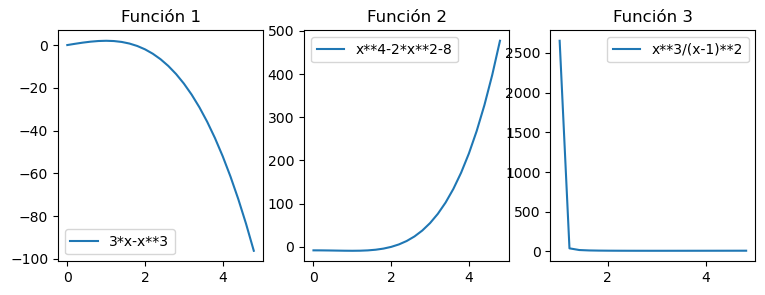

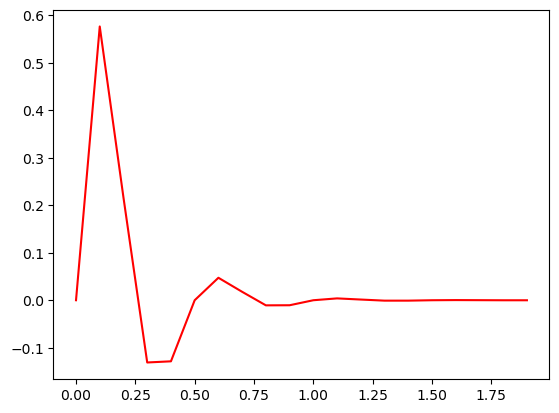

In [10]:
def f1(x):
    return (3*x-x**3)

def fc1(x):
    return np.sin(4*np.pi*x)*np.exp(-5*x)

t = np.arange(0., 5., 0.2)

fig = plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.plot(t, f1(t))
plt.title('Función 1')
plt.legend(['3*x-x**3'])

plt.subplot(132)
plt.plot(t, (t**4-2*t**2-8))
plt.title('Función 2')
plt.legend(['x**4-2*x**2-8'])

t = np.arange(1.02, 5., 0.2)
plt.subplot(133)
plt.plot(t, (t**3/(t-1)**2))
plt.title('Función 3')
plt.legend(['x**3/(x-1)**2'])
#plt.suptitle('3 funciones')
plt.show()
fig.savefig('varias_funciones.png')
fig.savefig('varias_funciones_alta.png', dpi=600)
 
fig = plt.figure()
t = np.arange(0., 2., 0.1) # Prueba a cambiar estos parámetros para que la gráfica se dibuje como quieras
plt.plot(t, fc1(t), 'r')
fig.savefig('una_funcion.pdf')


## Miscelánea: zoom, resolución, funciones sobre vectores...

Algunas funciones de numpy tienen nombre similar a las de la base de python o su módulo `math`, por ejemplo `sqrt()`. Asegúrate de usar siempre las de numpy cuando trabajes con vectores o matrices o tendrás un error de tipo. 

Hay muchos parámetros para personalizar la gráfica (cambiar etiquetas en los ejes, escala logarítmica, rango de datos visualizados...). 

Por defecto matplotlib ajusta al rango de la x e y para visualizar la gráfica entera. A veces nos interesa cambiar esto, suele ser útil `xlim` e `ylim` para ajustar el zoom.


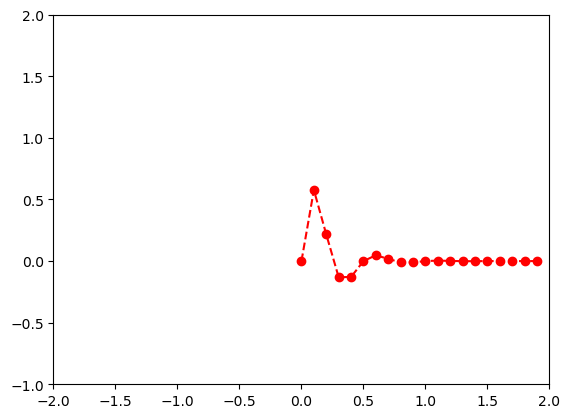

In [11]:
def fc1(x):
    return np.sin(4*np.pi*x)*np.exp(-5*x)

t = np.arange(0., 5., 0.2)

fig = plt.figure()
t = np.arange(0., 2., 0.1) # Prueba a cambiar estos parámetros para que la gráfica se dibuje como quieras
plt.xlim(-2,2)
plt.ylim(-1,2)
plt.plot(t, fc1(t), 'ro--')


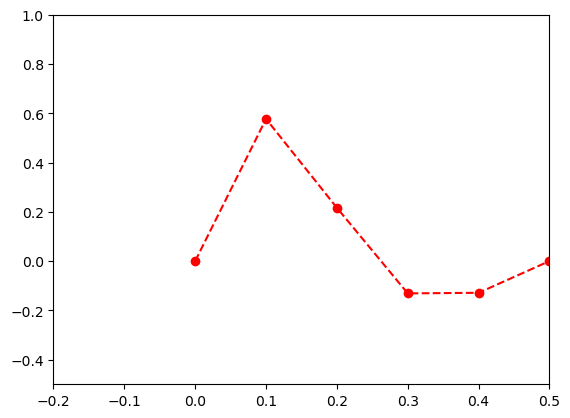

In [12]:
fig = plt.figure()
t = np.arange(0., 2., 0.1) 
plt.xlim(-.2,.5)
plt.ylim(-.5,1)
plt.plot(t, fc1(t), 'ro--')

Después del zoom nos damos cuenta de que necesitamos más puntos para dibujar con más precisión la figura

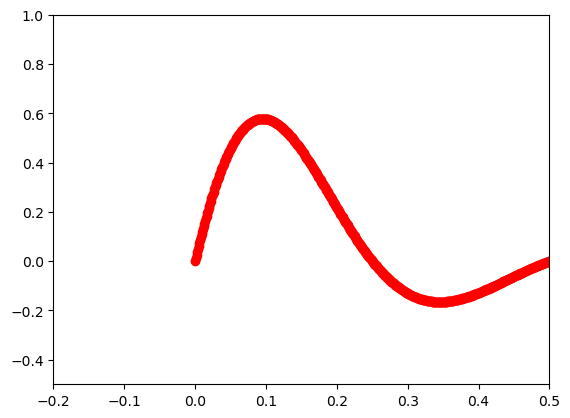

In [13]:

fig = plt.figure()
t = np.arange(0., 2., 0.001) 
plt.xlim(-.2,.5)
plt.ylim(-.5,1)
plt.plot(t, fc1(t), 'ro--')

## Visualizar imágenes

Vamos a visualizar una imagen de ejemplo. Usaremos la de la programadora de la NASA [Margaret Hamilton](https://www.lasinnovadoras.com/resenas/margaret-hamilton-responsable-software-navegacion-apolo-11-n220), que fue responsable del software de navegación del Apolo 11.

Esto nos permitirá ver que las imágenes no-vectoriales se almacenan como matrices donde cada casilla es el valor de la combinación de [colores RGB](https://es.wikipedia.org/wiki/RGB) (rojo, verde, azul) o valor negro en imágenes en blanco y negro como esta. 

<img src="https://raw.githubusercontent.com/javism/fi2022-2023/main/practica07/margaret_hamilton.jpg" width = "200" height = "500" >


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('margaret_hamilton.jpg')
# Dimensiones de la imagen (alto x ancho)
print(img.shape)
print(img)

(1274, 1024)
[[242 242 242 ... 185 197 207]
 [242 242 242 ... 221 208 192]
 [243 243 243 ... 227 223 215]
 ...
 [169 162 165 ... 133 136 141]
 [160 155 152 ... 132 140 130]
 [149 144 142 ... 154 163 154]]


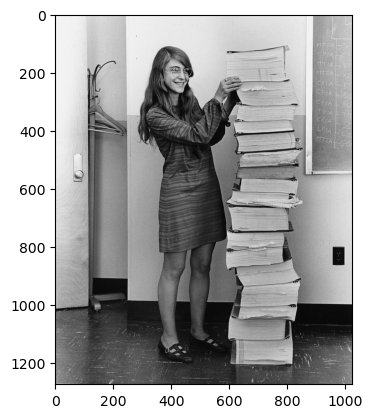

In [15]:
plt.imshow(img, cmap="gray")

Como la imagen es una matriz, podemos modificar cada pixel o grupo de pízeles. 

Por ejemplo, lo siguiente añade una banda negra (valor 0) en todas las columnas de las filas 600 a 699

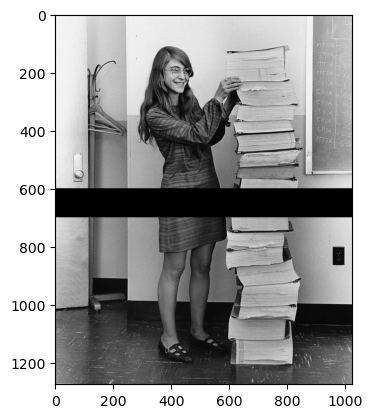

In [16]:
copia_img = img.copy()
copia_img[600:700,:] = 0
plt.imshow(copia_img, cmap="gray")

Podemos variar la intensidad con otros valores entre 0 y 255. Lo siguiente añade un rectángulo gris:

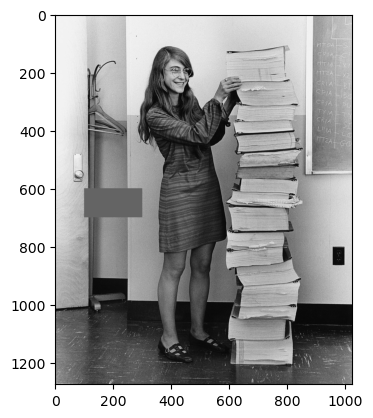

In [17]:
copia_img = img.copy()
copia_img[600:700,100:300] = 100
plt.imshow(copia_img, cmap="gray")

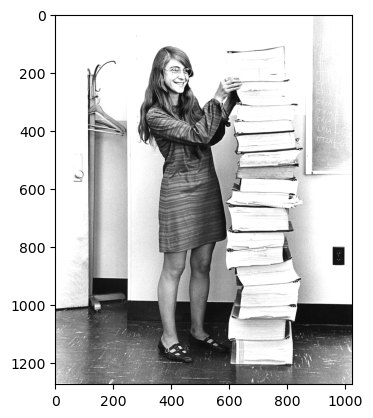

In [18]:
copia_img = img.copy()
copia_img = copia_img*1.5
copia_img[copia_img>255] = 255 # Filtro paso alta para los valores que pasen de máximo de blanco
plt.imshow(copia_img, cmap="gray")